In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys
sys.path.append("../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd
from sklearn.preprocessing import MinMaxScaler

In [2]:
paths_to_csv = {}

# Display time series of different angles

In [3]:
path_tds_angles = '../../results/big_dataset/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [4]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [5]:
paths_to_csv

{'S001C': [('angl_bow_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_bow_mov.csv'),
  ('angl_head_inclination',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_head_inclination.csv'),
  ('angl_left_cheek_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_cheek_mov.csv'),
  ('angl_left_elbow_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_elbow_mov.csv'),
  ('angl_left_fingers_pos_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_fingers_pos_mov.csv'),
  ('angl_left_hips_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_hips_mov.csv'),
  ('angl_left_should_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_should_mov.csv'),
  ('angl_left_wrist_round',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_wrist_round.csv'),
  ('angl_right_cheek_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_right_cheek_mov.csv'),
  ('angl_right_elbow_mov',
   '../../results/big_dataset/TSD_angl

In [6]:
# sort values to show firstly C class then I and S
names_of_videos = [v for v in paths_to_csv.keys()]
names_of_videos.sort(key=lambda v: v[::-1])
print(names_of_videos)

['S001C', 'S002C', 'S007C', 'S008C', 'S009C', 'S002I', 'S003I', 'S005I', 'S007I', 'S009I', 'S001S', 'S002S', 'S004S', 'S007S', 'S009S']


In [7]:
angles = pd.read_csv(paths_to_csv[names_of_videos[0]][0][1])['angle'].to_list()

In [8]:
num_of_metrics = len(paths_to_csv[names_of_videos[0]])

In [9]:
paths_to_csv

{'S001C': [('angl_bow_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_bow_mov.csv'),
  ('angl_head_inclination',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_head_inclination.csv'),
  ('angl_left_cheek_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_cheek_mov.csv'),
  ('angl_left_elbow_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_elbow_mov.csv'),
  ('angl_left_fingers_pos_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_fingers_pos_mov.csv'),
  ('angl_left_hips_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_hips_mov.csv'),
  ('angl_left_should_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_should_mov.csv'),
  ('angl_left_wrist_round',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_left_wrist_round.csv'),
  ('angl_right_cheek_mov',
   '../../results/big_dataset/TSD_angles\\S001C\\angl_right_cheek_mov.csv'),
  ('angl_right_elbow_mov',
   '../../results/big_dataset/TSD_angl

In [10]:
limits_max = np.zeros(num_of_metrics)
limits_min = [10000]*num_of_metrics
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        print(names_of_videos[i])
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = pd.read_csv(curr_path)['angle'].to_list()
        angle_max = max(angles)
        angle_min = min(angles)
        if limits_max[j] < angle_max:
            limits_max[j] = angle_max
        if limits_min[j] > angle_min:
            limits_min[j] = angle_min

S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S001C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S002C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S007C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S008C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S009C
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S002I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S003I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S005I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S007I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S009I
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S001S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S002S
S004S
S004S
S004S
S004S
S004S
S004S
S004S
S004S
S004S
S004S
S004

In [11]:
experiment_suff = "big_dataset_"

In [12]:
def smooth_time_series(time_series, window_size):
    smoothed_series = []
    for i in range(len(time_series)):
        lower_bound = max(0, i - window_size)
        upper_bound = min(len(time_series), i + window_size + 1)
        window = time_series[lower_bound:upper_bound]
        average = sum(window) / len(window)
        smoothed_series.append(average)
    return smoothed_series

In [37]:
fig, axs = plt.subplots(len(paths_to_csv['S005I']),len(names_of_videos), figsize=(260, 90))
for i in range(len(names_of_videos)):
    #for j in range(num_of_metrics):
    for j in [0,]:
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = smooth_time_series(pd.read_csv(curr_path)['angle'].to_list(), 10)
        axs[j][i].plot(angles)
        axs[j][i].title.set_text(names_of_videos[i] + "\n" + curr_metric)
        axs[j][i].set_yticks(np.arange(limits_min[j], limits_max[j], step=50))
plt.tight_layout()
plt.savefig(experiment_suff+"results_consider_angles.png")
plt.close()

TypeError: 'AxesSubplot' object is not subscriptable

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D79BB5CEE8> (for post_execute):


KeyboardInterrupt: 

In [15]:
fig, axs = plt.subplots(len(names_of_videos), 1, figsize=(160, 90))
for i in range(len(names_of_videos)):
    #for j in range(num_of_metrics):
    for j in [0,]:
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = smooth_time_series(pd.read_csv(curr_path)['angle'].to_list(), 10)
        slope = pd.Series(np.gradient(tmp.data), tmp.index, name='slope')
        axs[i].plot(angles)
        axs[i].title.set_text(names_of_videos[i] + "\n" + curr_metric)
        axs[i].set_yticks(np.arange(limits_min[j], limits_max[j], step=50))
plt.tight_layout()
plt.savefig(experiment_suff+"bov_mov_angles.png")
plt.close()

## Results
We can see the pattern in the following angle -> rwrist, lshoul, lhip (moving of the bow)

# Analyse the moving of the bow

In [46]:
bow_moving = []

angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov


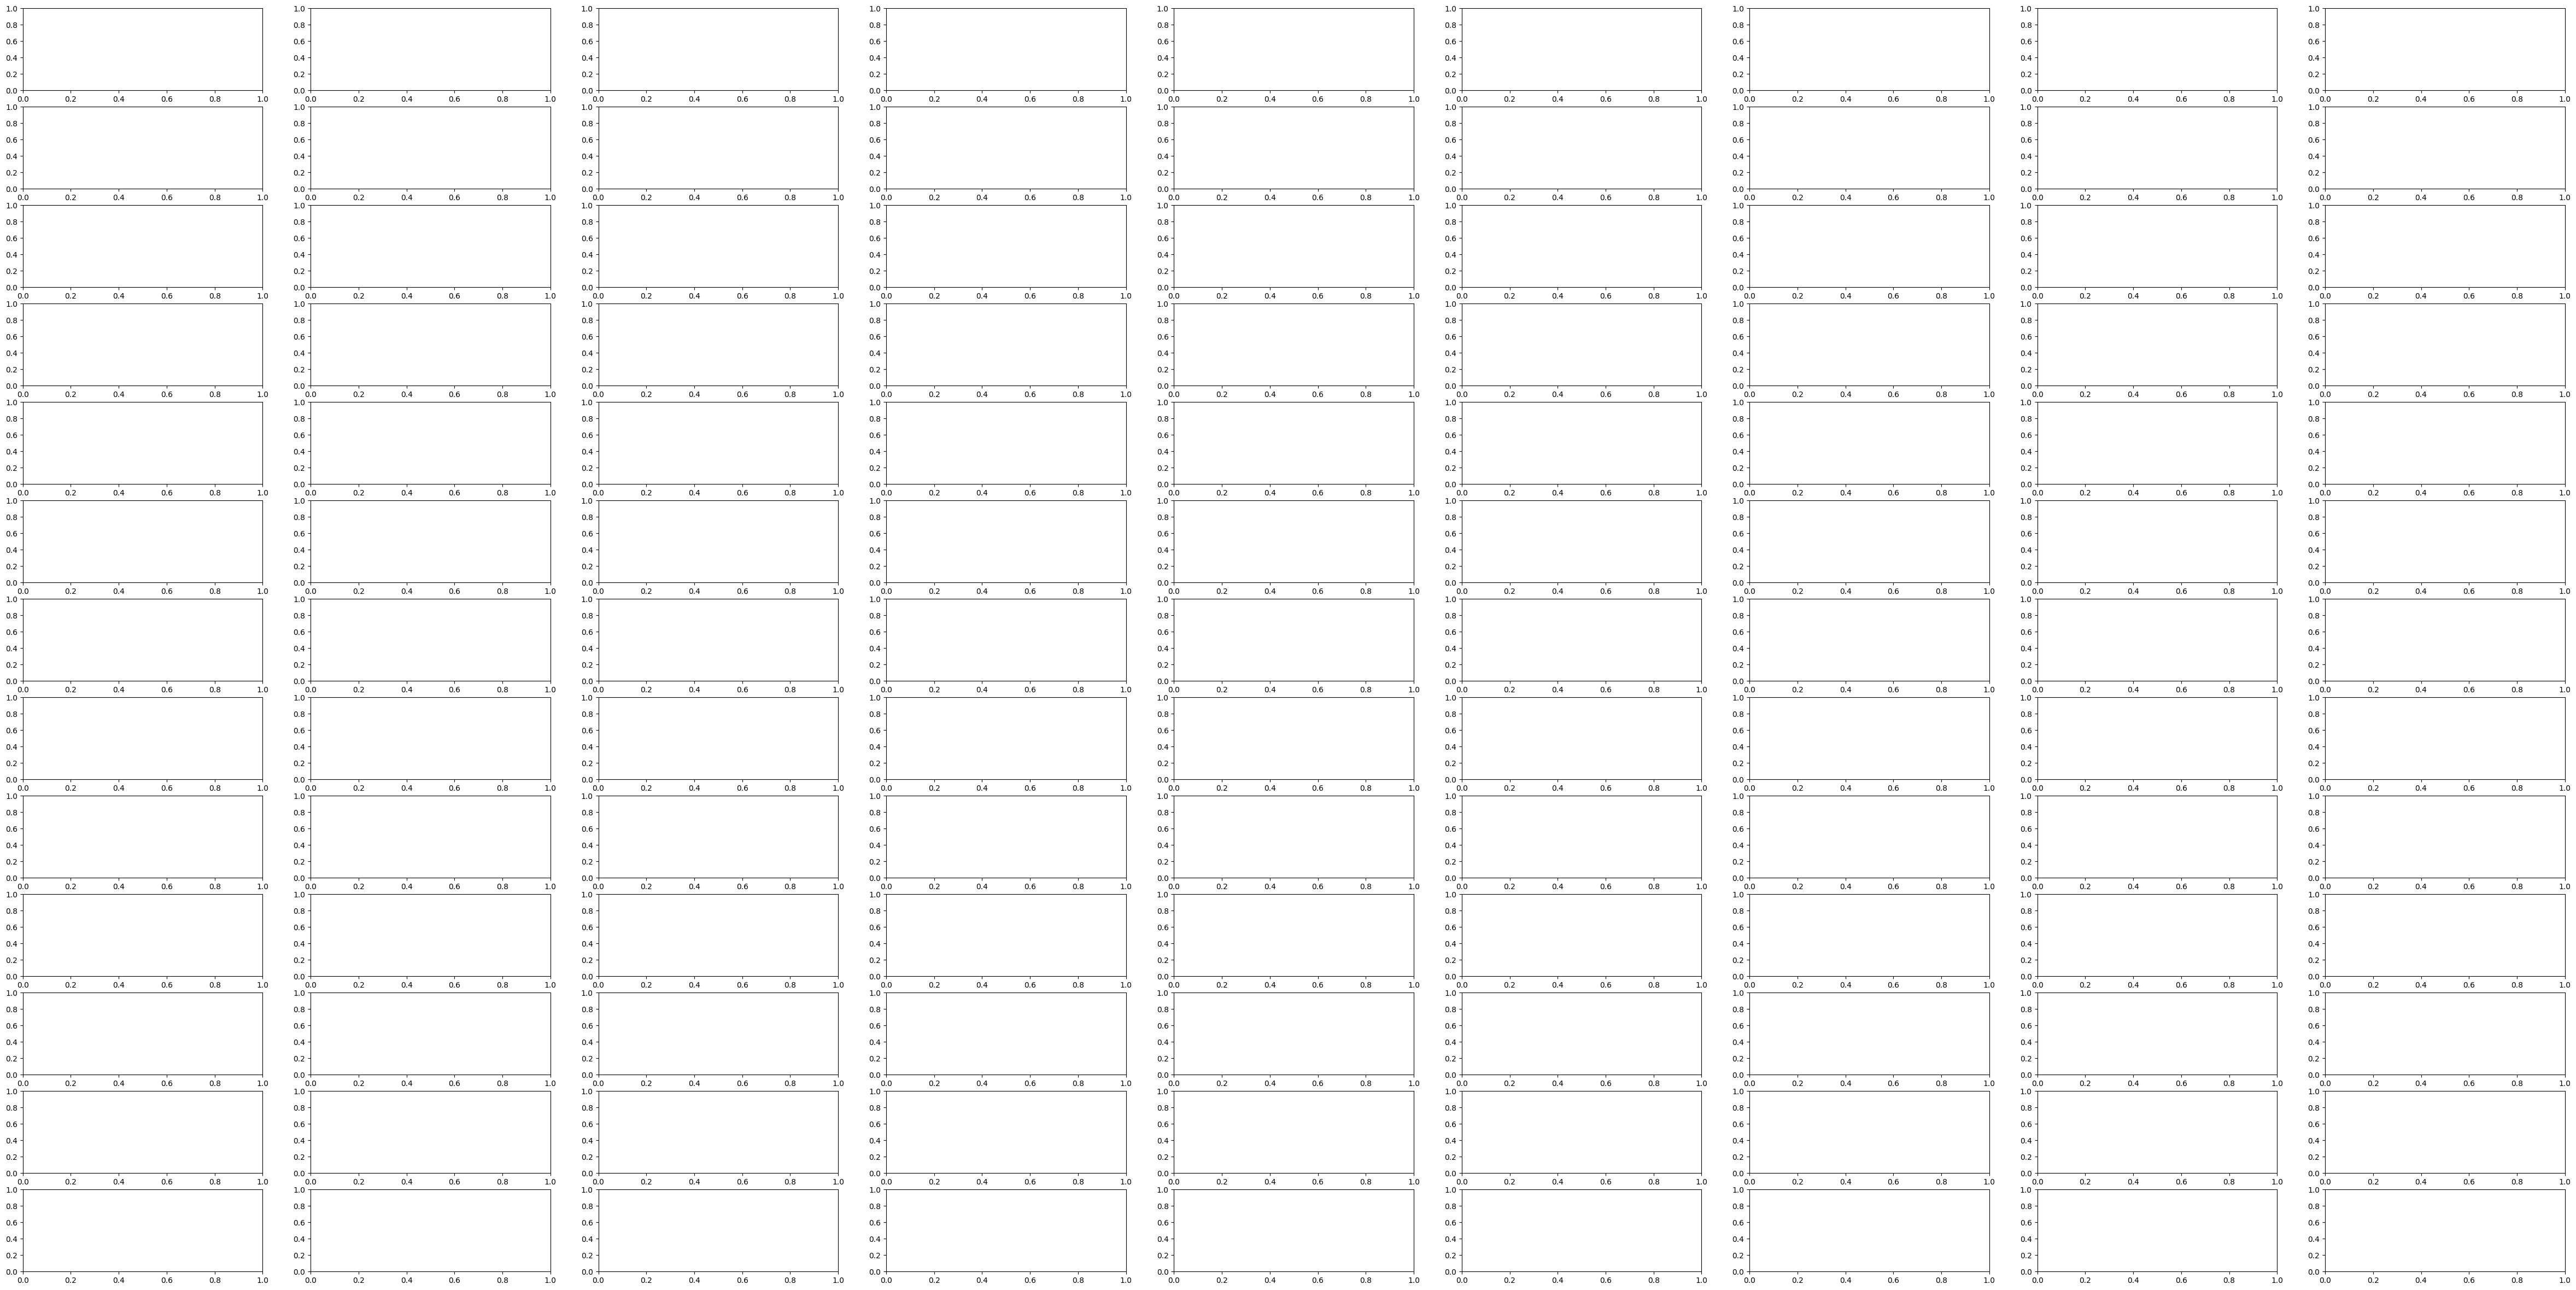

In [47]:
fig, axs = plt.subplots(len(paths_to_csv['S005I']),len(names_of_videos), figsize=(60, 30))
for i in range(len(names_of_videos)):
    for j in [0,]:
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        print(curr_metric)
        angles = pd.read_csv(curr_path)['angle'].to_list()
        bow_moving.append(angles)

In [185]:
def num_higher_lower_mean(arr, num_ignore=0):
    #mean = (max(arr)-10)/2
    arr = arr[num_ignore:]
    arr = np.array(arr)
    #arr = 5**arr
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_array = scaler.fit_transform(arr.reshape(-1, 1))
    # mean = np.mean(arr)
    #mean = np.float(arr[10])
    #print(mean)
    count_higher = (scaled_array > scaled_array[0]).sum()
    count_smaller_equal = (scaled_array <= scaled_array[0]).sum()
    return [count_higher, count_smaller_equal]

In [191]:
di_to_df = {}
df_features = {}
indexes_features = []

In [192]:
for i in range(len(names_of_videos)):
    print(names_of_videos[i])
    res = num_higher_lower_mean(bow_moving[i], num_ignore=50)
    di_to_df[names_of_videos[i]] = res
    di_to_df[names_of_videos[i]].append(res[1]/res[0])
    di_features = create_feature_dict_from_tsd(bow_moving[i])
    df_features[names_of_videos[i]] = di_features.values()
    indexes_features = di_features.keys()

S001C
S002C
S008C
S002I
S003I
S005I
S001S
S004S
S009S


In [189]:
df = pd.DataFrame(di_to_df, index = ["count_higher", "count_smaller_equal", "count_smaller_equal/count_higher"])

In [190]:
df

,S001C,S002C,S008C,S002I,S003I,S005I,S001S,S004S,S009S
count_higher,61.000000,66.000000,66.000000,152.000000,195.000000,211.00000,65.000000,128.000000,93.000000
count_smaller_equal,195.000000,190.000000,190.000000,104.000000,55.000000,45.00000,191.000000,122.000000,157.000000
count_smaller_equal/count_higher,3.196721,2.878788,2.878788,0.684211,0.282051,0.21327,2.938462,0.953125,1.688172


In [208]:
pd.DataFrame(df_features, index = indexes_features).iloc[[10]].apply(lambda v: round(v,1))

,S001C,S002C,S008C,S002I,S003I,S005I,S001S,S004S,S009S
kurtosis,-1.5+0.0j,-1.0+0.0j,-1.7+0.0j,7.2+0.0j,2.2+0.0j,1.7+0.0j,-0.0+0.0j,-0.1+0.0j,-0.6+0.0j


# Analysis of feature engineering

In [40]:
names_of_metrics = []
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        names_of_metrics.append(curr_metric)
    break

sample_tsd = pd.read_csv(curr_path)['angle'].to_list()
names_metrics_and_features = []
for metr in names_of_metrics:
    for feature_n in create_feature_dict_from_tsd(sample_tsd).keys():
        names_metrics_and_features.append(f"{metr}_{feature_n}")

In [41]:
di_df = {}
di_df["features_of_metrics"] = names_metrics_and_features

In [42]:
for i in range(len(names_of_videos)):
    curr_metrics = []
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles_tsd = pd.read_csv(curr_path)['angle'].to_list()
        features_di = create_feature_dict_from_tsd(angles_tsd)
        features = list(features_di.values())
        curr_metrics.extend(features)
    di_df[names_of_videos[i]] = curr_metrics

In [43]:
df = pd.DataFrame(data=di_df)
df.to_csv("../../results/TSD_angles/extracted_features.csv")

In [44]:
df

,features_of_metrics,S001C,S002C,S008C,S002I,S003I,S005I,S001S,S004S,S009S
0,angl_bow_mov_mean,76.830251+0.000000j,68.583402+0.000000j,54.267763+0.000000j,35.365808+0.000000j,39.916350+0.000000j,24.163687+0.000000j,44.868354+0.000000j,65.991443+0.000000j,78.625578+0.000000j
1,angl_bow_mov_var,1043.06621+0.00000j,186.077299+0.000000j,733.879394+0.000000j,177.082557+0.000000j,447.781385+0.000000j,52.490857+0.000000j,294.830209+0.000000j,790.162151+0.000000j,805.973607+0.000000j
2,angl_bow_mov_mad,30.385701+0.000000j,11.748290+0.000000j,27.887872+0.000000j,3.8219550+0.0000000j,4.8431270+0.0000000j,1.9893340+0.0000000j,8.0152080+0.0000000j,17.207783+0.000000j,20.075995+0.000000j
3,angl_bow_mov_max,125.061729+0.000000j,89.598037+0.000000j,90.732960+0.000000j,98.233452+0.000000j,111.928556+0.000000j,47.888241+0.000000j,84.296444+0.000000j,138.640912+0.000000j,134.162943+0.000000j
4,angl_bow_mov_min,21.250317+0.000000j,35.509156+0.000000j,6.7995080+0.0000000j,21.128953+0.000000j,20.458603+0.000000j,15.993056+0.000000j,10.673398+0.000000j,24.094896+0.000000j,18.369220+0.000000j
...,...,...,...,...,...,...,...,...,...,...
242,angl_right_should_mov_meanFreq,65.955493+0.000000j,26.048732+0.000000j,42.025544+0.000000j,21.984242-0.000000j,17.074938-0.000000j,10.374508-0.000000j,13.361468+0.000000j,15.841057+0.000000j,2.5197400+0.0000000j
243,angl_right_should_mov_skewnessFreq,17.257566+0.000000j,17.542095-0.000000j,14.805501+0.000000j,16.261595-0.000000j,13.339921-0.000000j,17.431341+0.000000j,18.225815-0.000000j,15.843463+0.000000j,12.914536-0.000000j
244,angl_right_should_mov_kurtosisFreq,304.867259+0.000000j,304.282794-0.000000j,233.001181+0.000000j,275.862272-0.000000j,216.747833-0.000000j,301.376363+0.000000j,320.042116-0.000000j,262.574597+0.000000j,210.276003+0.000000j
245,angl_right_should_mov_median,38.077658+0.000000j,35.774391+0.000000j,30.798603+0.000000j,24.186996+0.000000j,20.059365+0.000000j,14.384317+0.000000j,10.700603+0.000000j,24.422180+0.000000j,9.1975130+0.0000000j


In [28]:
correl = df.corr()

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\pandas\core\internals\managers.py:1464: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)  # type: ignore[arg-type]


In [29]:
correl.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002C,S002I,S003I,S005I,S001S,S004S,S009S
S001C,1.000000,0.979585,0.975323,0.984160,0.965048,0.977015,0.997006,0.986382
S002C,0.979585,1.000000,0.948620,0.963801,0.955429,0.942674,0.969717,0.975943
S002I,0.975323,0.948620,1.000000,0.994115,0.984238,0.982389,0.982174,0.977898
S003I,0.984160,0.963801,0.994115,1.000000,0.986413,0.991034,0.990676,0.986786
S005I,0.965048,0.955429,0.984238,0.986413,1.000000,0.974136,0.968510,0.973377
S001S,0.977015,0.942674,0.982389,0.991034,0.974136,1.000000,0.987413,0.982940
S004S,0.997006,0.969717,0.982174,0.990676,0.968510,0.987413,1.000000,0.986990
S009S,0.986382,0.975943,0.977898,0.986786,0.973377,0.982940,0.986990,1.000000


In [30]:
correl_2 = df.drop('S002C', axis=1).corr()

In [31]:
correl_2.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002I,S003I,S005I,S001S,S004S,S009S
S001C,1.000000,0.975323,0.984160,0.965048,0.977015,0.997006,0.986382
S002I,0.975323,1.000000,0.994115,0.984238,0.982389,0.982174,0.977898
S003I,0.984160,0.994115,1.000000,0.986413,0.991034,0.990676,0.986786
S005I,0.965048,0.984238,0.986413,1.000000,0.974136,0.968510,0.973377
S001S,0.977015,0.982389,0.991034,0.974136,1.000000,0.987413,0.982940
S004S,0.997006,0.982174,0.990676,0.968510,0.987413,1.000000,0.986990
S009S,0.986382,0.977898,0.986786,0.973377,0.982940,0.986990,1.000000


In [32]:
correl_3 = df.drop('S002C', axis=1).drop('S005I', axis=1).corr()

In [33]:
correl_3.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002I,S003I,S001S,S004S,S009S
S001C,1.000000,0.975323,0.984160,0.977015,0.997006,0.986382
S002I,0.975323,1.000000,0.994115,0.982389,0.982174,0.977898
S003I,0.984160,0.994115,1.000000,0.991034,0.990676,0.986786
S001S,0.977015,0.982389,0.991034,1.000000,0.987413,0.982940
S004S,0.997006,0.982174,0.990676,0.987413,1.000000,0.986990
S009S,0.986382,0.977898,0.986786,0.982940,0.986990,1.000000
